In [28]:
import nltk
import spacy
import PyPDF2
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag

# NLTK data download (Required for first run)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

# Function to extract text from PDF
def extract_text_from_pdf(pdf_path):
    text = ""
    try:
        with open(pdf_path, 'rb') as file:
            reader = PyPDF2.PdfReader(file)
            for page in reader.pages:
                raw_text = page.extract_text()
                if raw_text:
                    cleaned_text = ' '.join(raw_text.split())
                    text += cleaned_text + "\n"
    except FileNotFoundError:
        print(f"File not found: {pdf_path}")
        return None
    except PyPDF2.errors.PdfReadError:
        print(f"PDF file cannot be read: {pdf_path}.")
        return None
    return text

# Contextual analysis functions (using spaCy)
def analyze_context(content):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(content)
    relevant_roles = [
        entity.text for entity in doc.ents
        if entity.label_ in ["EDUCATION", "RELEVANT EXPERIENCE", "CLASS PROJECT EXPERIENCE", "SKILLS", "HONORS AND AWARDS"]
    ]
    return relevant_roles

# Relevant syntax extraction function (using NLTK) - with deduplication logic
def extract_relevant_phrases(content, relevant_keywords):
    sentences = sent_tokenize(content)
    stop_words = set(stopwords.words('english'))
    relevant_phrases = {}

    for sentence in sentences:
        words = word_tokenize(sentence)
        filtered_words = [word for word in words if word.isalpha() and word.lower() not in stop_words]
        tagged_words = pos_tag(filtered_words)
        for word, tag in tagged_words:
            if tag in ('NN', 'NNP') and word.lower() in relevant_keywords:
                relevant_phrases[sentence] = relevant_phrases.get(sentence, []) + [word]
    result = []
    for sentence, keywords in relevant_phrases.items():
        for keyword in keywords:
            result.append((keyword, sentence))
    return result

# Keyword score calculation function without duplicates and one word per sentence
def score_content(content, keyword_weights):
    score = 0
    max_score = 100  # Fixed maximum score
    sentences = sent_tokenize(content)

    for sentence in sentences:
        words = word_tokenize(sentence.lower())
        scored_keywords = set()  # Set to track keywords already scored in this sentence

        for keyword, weight in keyword_weights.items():
            if keyword in words and keyword not in scored_keywords:
                score += weight
                scored_keywords.add(keyword)
                break  # Only allow one keyword per sentence to contribute to the score

    return min(score, max_score)  # Ensure the score does not exceed the maximum

# Main
if __name__ == "__main__":
    pdf_path = "C:\\Users\\고요한\\Desktop\\crawling\\resume example.pdf"  # PDF 파일 경로
    pdf_content = extract_text_from_pdf(pdf_path)

    if pdf_content is None:
        print("PDF content extraction failed.")
    elif not pdf_content.strip():
        print("PDF content extraction failed.")
    else:
        print("Extracted PDF content:\n", pdf_content)

        relevant_roles = analyze_context(pdf_content)

        relevant_keywords = ['director', 'film', 'movie', 'cinema', 'award', 'production', 'screenwriter', 'cinematographer']
        relevant_phrases = extract_relevant_phrases(pdf_content, relevant_keywords)

        keyword_weights = {
            "director": 9, "film": 7, "movie": 7, "cinema": 5,
            "award": 10, "production": 15, "screenwriter": 23, "cinematographer": 8
        }

        pdf_score = score_content(pdf_content, keyword_weights)

        print(f"\nPDF resume score: {pdf_score}/100")

        # Discrimination logic
        if pdf_score >= 50:  # Pass threshold set to 50
            print("Result: Pass (가능)")
        else:
            print("Result: Fail (불가능)")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\고요한\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\고요한\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\고요한\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Extracted PDF content:
 First & Last Name (14pt-18pt font) Professional Email Address • Phone Number Portfolio, Website or LinkedIn URL (Optional) EDUCA TION Seoul Institute of the Arts, Seoul, South Korea Bachelor of Fine Arts in Film and Media Production, February 2018 RELEV ANT EXPERIENCE Independent Film Production, Seoul, South Korea Film Director , March 2019 - Present ● Directed and produced three independent short films screened at local film festivals, including the Seoul Independent Film Festival. ● Managed a production crew of up to 10 members, ensuring tight schedules and budget adherence. ● Collaborated with emer ging writers to adapt short stories into screenplays. ● Spearheaded post-production workflows, including editing and sound design, using Adobe Premiere Pro and Pro Tools. Freelance Assistant Director , Various Productions, Seoul, South Korea March 2018 - February 2019 ● Assisted in the direction of commercial film projects, working closely with senior directors. ●

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\고요한\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\고요한\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\고요한\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Extracted PDF content:
 First & Last Name (14pt-18pt font) Professional Email Address • Phone Number Portfolio, Website or LinkedIn URL (Optional) EDUCA TION Seoul Institute of the Arts, Seoul, South Korea Bachelor of Fine Arts in Film and Media Production, February 2018 RELEV ANT EXPERIENCE Independent Film Production, Seoul, South Korea Film Director , March 2019 - Present ● Directed and produced three independent short films screened at local film festivals, including the Seoul Independent Film Festival. ● Managed a production crew of up to 10 members, ensuring tight schedules and budget adherence. ● Collaborated with emer ging writers to adapt short stories into screenplays. ● Spearheaded post-production workflows, including editing and sound design, using Adobe Premiere Pro and Pro Tools. Freelance Assistant Director , Various Productions, Seoul, South Korea March 2018 - February 2019 ● Assisted in the direction of commercial film projects, working closely with senior directors. ●

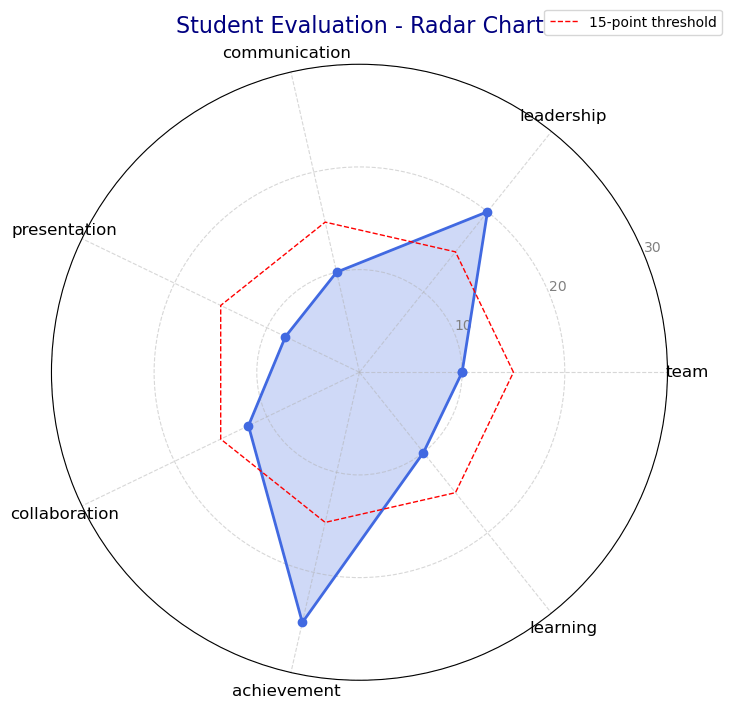

In [5]:
import nltk
import spacy
import PyPDF2
import matplotlib.pyplot as plt
import numpy as np
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag

# NLTK data download (Required for first run)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

# Function to extract text from PDF
def extract_text_from_pdf(pdf_path):
    text = ""
    try:
        with open(pdf_path, 'rb') as file:
            reader = PyPDF2.PdfReader(file)
            for page in reader.pages:
                raw_text = page.extract_text()
                if raw_text:
                    cleaned_text = ' '.join(raw_text.split())
                    text += cleaned_text + "\n"
    except FileNotFoundError:
        print(f"File not found: {pdf_path}")
        return None
    except PyPDF2.errors.PdfReadError:
        print(f"PDF file cannot be read: {pdf_path}.")
        return None
    return text

# Contextual analysis functions (using spaCy)
def analyze_context(content):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(content)
    relevant_roles = [
        entity.text for entity in doc.ents
        if entity.label_ in ["EDUCATION", "RELEVANT EXPERIENCE", "CLASS PROJECT EXPERIENCE", "SKILLS", "HONORS AND AWARDS"]
    ]
    return relevant_roles

# Relevant syntax extraction function (using NLTK)
def extract_relevant_phrases(content, relevant_keywords):
    sentences = sent_tokenize(content)
    stop_words = set(stopwords.words('english'))
    relevant_phrases = {}

    for sentence in sentences:
        words = word_tokenize(sentence)
        filtered_words = [word for word in words if word.isalpha() and word.lower() not in stop_words]
        tagged_words = pos_tag(filtered_words)
        for word, tag in tagged_words:
            if tag in ('NN', 'NNP') and word.lower() in relevant_keywords:
                relevant_phrases[sentence] = relevant_phrases.get(sentence, []) + [word]
    result = []
    for sentence, keywords in relevant_phrases.items():
        for keyword in keywords:
            result.append((keyword, sentence))
    return result

# Keyword score calculation function without duplicates and one word per sentence
def score_content(content, keyword_weights):
    score = 0
    max_score = 100  # Fixed maximum score
    sentences = sent_tokenize(content)
    missing_scores = {key: weight for key, weight in keyword_weights.items()}

    for sentence in sentences:
        words = word_tokenize(sentence.lower())
        scored_keywords = set()  # Reset scored_keywords for each sentence

        for keyword, weight in keyword_weights.items():
            if keyword in words and keyword not in scored_keywords:
                score += weight
                scored_keywords.add(keyword)
                if keyword in missing_scores:
                    del missing_scores[keyword]
                break  # Only allow one keyword per sentence to contribute to the score

    return min(score, max_score), missing_scores  # Ensure the score does not exceed the maximum

# Visualization function
def visualize_evaluation(result, evaluation_type, missing_scores):
    labels = list(missing_scores.keys())
    values = list(missing_scores.values())

    # Create a radar chart
    num_vars = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    values += values[:1]  # Repeat the first value to close the circle
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={"projection": "polar"})

    # Draw the outline of the radar chart
    ax.fill(angles, values, color='royalblue', alpha=0.25)
    ax.plot(angles, values, color='royalblue', linewidth=2, marker='o')

    # Add 15-point dashed line for comparison
    ax.plot(angles, [15] * len(angles), color='red', linestyle='--', linewidth=1, label='15-point threshold')

    # Add grid and labels
    ax.set_yticks([10, 20, 30])
    ax.set_yticklabels(["10", "20", "30"], color="gray", fontsize=10)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=12, color="black")

    # Add a title and gridlines
    title = "Student Evaluation - Radar Chart" if evaluation_type == "student" else "Teacher Evaluation - Radar Chart"
    ax.set_title(title, va='bottom', fontsize=16, color="navy")
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

    plt.show()

# Main
if __name__ == "__main__":
    # Predefined paths for teacher and student evaluations
    teacher_pdf_path = "C:\\Users\\고요한\\Desktop\\crawling\\resume example1.pdf"
    student_pdf_path = "C:\\Users\\고요한\\Desktop\\crawling\\resume example.pdf"

    # Choose evaluation type
    evaluation_type = input("Enter evaluation type ('teacher' or 'student'): ").strip().lower()
    if evaluation_type not in ["teacher", "student"]:
        print("Invalid evaluation type. Defaulting to 'teacher'.")
        evaluation_type = "teacher"

    pdf_path = teacher_pdf_path if evaluation_type == "teacher" else student_pdf_path

    keyword_weights = {
        "teacher": {
            "director": 9, "film": 7, "movie": 7, "cinema": 5,
            "award": 10, "production": 15, "screenwriter": 23, "cinematographer": 8
        },
        "student": {
            "project": 15, "team": 10, "leadership": 20, "communication": 10,
            "presentation": 8, "collaboration": 12, "achievement": 25, "learning": 10
        }
    }[evaluation_type]

    pdf_content = extract_text_from_pdf(pdf_path)

    if pdf_content is None:
        print("PDF content extraction failed.")
    elif not pdf_content.strip():
        print("PDF content extraction failed.")
    else:
        print("Extracted PDF content:\n", pdf_content)

        relevant_keywords = list(keyword_weights.keys())
        relevant_phrases = extract_relevant_phrases(pdf_content, relevant_keywords)

        pdf_score, missing_scores = score_content(pdf_content, keyword_weights)

        if evaluation_type == "teacher":
            all_above_15 = all(weight >= 15 for weight in keyword_weights.values())
            result_message = "Pass (모든 키워드 점수가 15 이상입니다)" if all_above_15 else "No Pass (15점 이하의 키워드 존재)"
            print(f"Result: {result_message}")
        elif evaluation_type == "student":
            if pdf_score >= 50:
                print("Result: Pass (가능)")
            else:
                print("Result: Fail (불가능)")
                print("Missing scores by keyword:")
                for keyword, weight in missing_scores.items():
                    shortfall = 15 - weight if weight < 15 else 0
                    print(f"- {keyword}: {weight} points ({shortfall} points below 15)" if shortfall > 0 else f"- {keyword}: {weight} points")

        visualize_evaluation({"score": pdf_score}, evaluation_type, missing_scores)
